# Courbe ROC et AUC

## Introduction

En plus des métriques de precision, recall et F1 score, il existe un autre outil qui permet de mesurer les performances d'un modèle de classification : la courbe ROC (ROC Curve).

La courbe ROC et sa mesure associée l'AUC (Aire sous la courbe) permettent d'évaluer les performances globales d'un modèle mais aussi de comparer facilement les performances de plusieurs modèles de classifications entre eux. 

La courbe ROC est donc un outil qui peut faciliter notre décision concernant le choix du modèle de classification à utiliser.

## Partie théorique 

Lorsqu'un modèle de classification fait une prédiction sur une observation, il va lui attribuer une des classes disponibles. Par exemple si notre modèle doit prédire si une image contient un chien ou un chat, alors les classes seront chien et chat. On peut définir que la classe chien sera la classe positive, qu'on cherche à detecter, et la classe chat sera la classe négative.

Pour choisir dans quelle classe placer une observation, le modèle va utiliser le score de la fonction de décision. Plus ce score est élevé, plus la prédiction est susceptible d'être positive. C'est une estimation de la probabilité que ce qu'on doit prédire soit positif.

Afin de choisir comment classer les observations entre ces deux classes on va utiliser un **seuil** (treshold). Si le score de la fonction de décision est supérieur au seuil, alors l'observation sera prédite comme positive, si elle est inférieur, alors elle sera prédite comme négative.

En déplacant ce seuil, on va modifier la capacité de notre modèle à détecter la classe positive. Lorsque l'on baisse ce seuil, notre modèle va classer un plus grand nombre de d'observations comme positives. A l'inverse lorsque l'on monte le seuil notre modèle va classer un moins grand nombre d'observations comme positive.

On va utiliser ce seuil pour tracer la courbe ROC, qui est un outil pour mesurer les performances globales d'un modèle de classification.

Pour obtenir la courbe, on fait varier notre seuil (treshold), et pour chaque valeur du seuil on place un point correspondant à l’intersection entre le TPR et le FPR sur un graphique. 

- Le TPR ou taux de réponses positives correctes, est un autre nom pour le recall, correspond aux nombres de prédictions positives correctes parmi les observations positives.
- Le FPR ou taux de réponses positives incorrectes correspond aux nombres de prédictions positives incorrectes parmi les observations négatives.

En plaçant toutes les combinaisons on obtient la courbe ROC.

Si on défini le seuil de notre modèle au minimum, alors toutes les observations seront classées comme positives → TPR de 1, mais FPR de 1 également.

A l’inverse si le seuil de notre modèle est au maximum, alors toutes les observations seront classés comme négatives → TPR de 0 et FPR de 0.

L’objectif est donc de trouver le seuil pour maximiser notre taux de vrai positifs et minimiser notre taux de faux positifs. En modifiant le seuil on affecte les performances de notre modèle.

L’intérêt de la courbe ROC est de voir les performances du modèle et d’ajuster le seuil en fonction, mais aussi de comparer les performances du modèle avec celles des autres modèles.

<img src="imgs/Untitled.png">

L’objectif est que la courbe ROC se rapproche le plus possible de la courbe parfaite. En revanche une courbe ROC ressemblant à celle de la courbe parfaite peut aussi être le signe d’overfitting ou de data leaking.

L'AUC ou aire sous la courbe, est une mesure complémentaire à la courbe ROC. L’AUC permet aussi d’évaluer la performance d’un modèle. 
Elle correspond à l’aire sous la courbe ROC. Plus l’AUC est élevé, meilleur est le modèle.

L’AUC évalue les performances globales du modèle, en s’intéressant à toute les combinaisons possibles produites avec le seuil, pour donner un score. En revanche l’AUC ne tient pas compte du type d’erreur pouvant être fait par le modèle.

La principale différence entre la courbe precision/recall et la courbe ROC est que l'on va :
- Privilégier la courbe precision/recall quand la classe positive est rare ou quand on accorde une plus grande importance aux faux positives qu’aux faux négatifs
- Dans le cas contraire on privilégie la courbe ROC

## Partie pratique

### Création d'un jeu de données pour la classification

In [2]:
# Importation des librairies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_predict

In [3]:
# Création d'un jeu de données avec deux classes à prédire

X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_classes=2, weights= [0.7], random_state=42)

make_classification est une fonction qui permet de créer un jeu de données fictif, dont on peut modifier les paramètres.

In [4]:
# Création des train et test set

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42, stratify=y)

### Entrainement du modèle

On va entrainer deux modèles pour montrer l'utilisation de la courbe ROC et AUC.

In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

# Entrainement de plusieurs modèles de classifications

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# On sauvegarde les prédictions faites sur le train test pour les modèles

y_train_pred_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
y_train_pred_rf = cross_val_predict(rf_clf, X_train, y_train, cv=3)

### Rappel sur les métriques

Lorsque l'on souhaite mesurer les performances d'un modèle de classification on dispose de plusieurs métriques : 

- L'accuracy -> Le nombre total de prédictions correctes parmi toutes les observations
- Le recall -> Le nombre prédictions positives correctes parmi toutes les observations positives
- La precision -> le nombre de prédictions positives correctes parmi les prédictions positives
- Le F1 score -> Une combinaison entre le recall et la precision

On peut également représenter les prédictions du modèle dans une matrice de confusion, qui permet de mieux comprendre les prédictions faites par le modèle et ses erreurs.

In [6]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, precision_recall_curve

# On crée la matrice de confusion en passant les classes et les prédictions du modèle
cm = confusion_matrix(y_train, y_train_pred_sgd)
conf_matrix = pd.DataFrame(cm, index=["Actual Class 0", "Actual Class 1"], columns=["Predicted Class 0", "Predicted Class 1"])

display(conf_matrix)

print("Score du recall : ", recall_score(y_train, y_train_pred_sgd))
print("Score de la precision : ", precision_score(y_train, y_train_pred_sgd))
print("Score F1 : ", f1_score(y_train, y_train_pred_sgd))

,Predicted Class 0,Predicted Class 1
Actual Class 0,532,24
Actual Class 1,45,199


Score du recall :  0.8155737704918032
Score de la precision :  0.8923766816143498
Score F1 :  0.8522483940042827


Il existe une fonction dans sklearn qui nous permet d'obtenir ces différentes métriques. Cette fonction nous permet de voir les métriques pour nos deux classes.

In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred_sgd))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       556
           1       0.89      0.82      0.85       244

    accuracy                           0.91       800
   macro avg       0.91      0.89      0.90       800
weighted avg       0.91      0.91      0.91       800



On peut aussi visualiser sur un graphique l'évolution de la précision et du recall en fonction du seuil. 

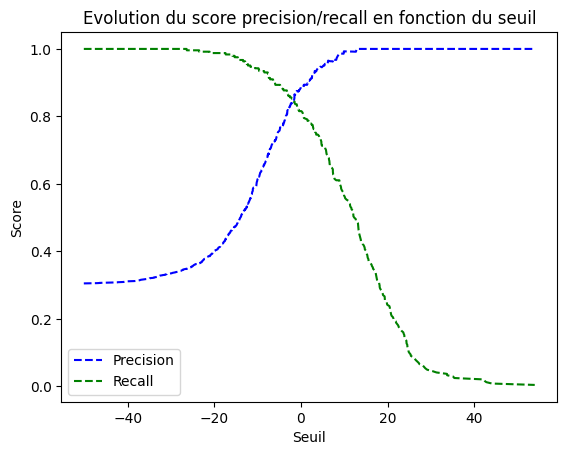

In [8]:
# Au lieu d'obtenir les prédictions, on récupere les scores de décisions pour chaque observations, grâce au paramètre method="decision_function"
y_scores_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")

# A partir des scores de décisions on calcule les combinaisons de scores pour recall et precision en fonction du seuil
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_sgd)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")

plt.title("Evolution du score precision/recall en fonction du seuil")
plt.xlabel("Seuil")
plt.ylabel("Score")
plt.legend()

plt.show()

On peut également représenter l'évolution de la precision en fonction du recall.

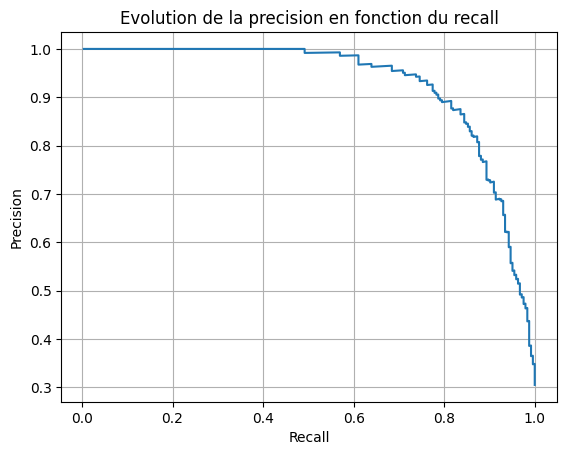

In [16]:
plt.plot(recalls[:-1], precisions[:-1])

plt.title("Evolution de la precision en fonction du recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()

plt.show()

Ce qu'on remarque c'est que lorsque l'on augmente le recall, on diminue la precision. 

Lorsque l'on a un problème de classification pour lequel on ne s'intéresse pas au type d'erreur, alors on va chercher à trouver un équilibre entre les deux. 
En revanche lorsqu'un type d'erreur à une importance plus grande qu'un autre type d'erreur, alors on va chercher à maximiser soit le recall, soit la precision.

Par exemple dans le cas du diagnostic d'une maladie (ou la classe positive représente la maladie), on va chercher à minimiser le nombre de prédictions négatives incorrectes (les faux négatifs). On ne souhaite pas dire à un patient qu'il est en bonne santé alors qu'il a en réalité la maladie. On va donc chercher à maximiser notre recall.

Dans le cas ou on cherche à minimiser le nombre de prédictions positifs incorrectes (les faux positifs), alors on va chercher à maximiser la precision.

maximiser le recall -> diminuer le nombre de faux négatifs

maximiser la precision -> diminuer le nombre de faux positifs

### Choix d'un seuil suivant un score de métrique

Lorsque l'on cherche à optimiser une métrique plutôt qu'une autre on va vouloir diminuer ou augmenter notre seuil.
Dans le cas ou on souhaite augmenter la precision, on augmente le seuil.
Dans le cas ou on souhaite augmenter le recall, on diminue le seuil.

Voici le code si on souhaite obtenir un score de precision de 0,9.

In [10]:
# On cherche dans nos seuils une valeur pour laquelle la precision est supérieur à 0.9
treshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print("Seuil pour obtenir une precision de 90% : ", treshold_90_precision)

# On crée de nouvelle prédictions ou la classe sera positive seulement si son score est supérieur au seuil permettant d'avoir 90% de précision
y_train_pred_90 = (y_scores_sgd >= treshold_90_precision)

print("score de precision", precision_score(y_train, y_train_pred_90))
print("score du recall", recall_score(y_train, y_train_pred_90))

Seuil pour obtenir une precision de 90% :  1.5643506399766398
score de precision 0.9014084507042254
score du recall 0.7868852459016393


### Courbe ROC 

On va maintenant représenter la courbe ROC. Pour rappel la courbe ROC est obtenue en variant le seuil donnant différentes valeurs de scores pour le TPR (taux de réponses positives, le recall) et le FPR (taux de faux positifs).

In [11]:
from sklearn.metrics import roc_curve

# La fonction roc_curve retourne le FPR, TPR et les seuils 
fpr_sgd, tpr_sgd, tresholds = roc_curve(y_train, y_scores_sgd)

In [12]:
# Fonction pour représenter la courbe ROC
def plot_roc_curve(fpr, tpr, label=None):

    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.title("Courbe ROC")
    plt.xlabel("Taux de Faux Positif")
    plt.ylabel("Taux de Vrai Positif")
    plt.grid()

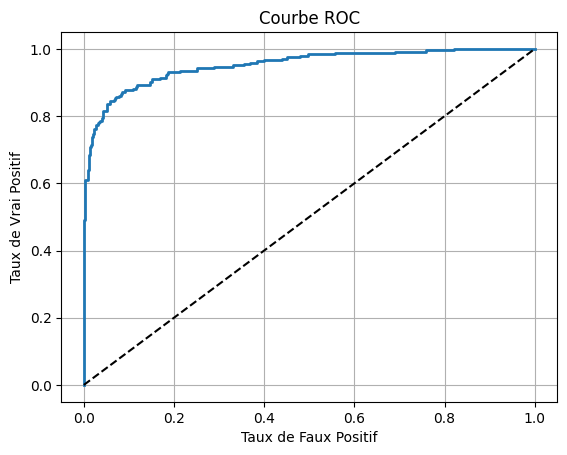

In [13]:
plot_roc_curve(fpr_sgd, tpr_sgd)
plt.show()

### AUC

On peut calculer l'aire sous la courbe ROC.

In [14]:
from sklearn.metrics import roc_auc_score

display(roc_auc_score(y_train, y_scores_sgd))

0.9525740063686757

### Comparaison de modèle avec ROC et AUC

L'intérêt de la courbe ROC et de l'AUC est de pouvoir comparer les performances de plusieurs modèles entre eux. 
Ici on va reprendre le modèle utiliser et le comparer avec un second modèle. 

array([[0.98, 0.02],
       [0.99, 0.01],
       [0.03, 0.97],
       ...,
       [0.82, 0.18],
       [1.  , 0.  ],
       [0.11, 0.89]])

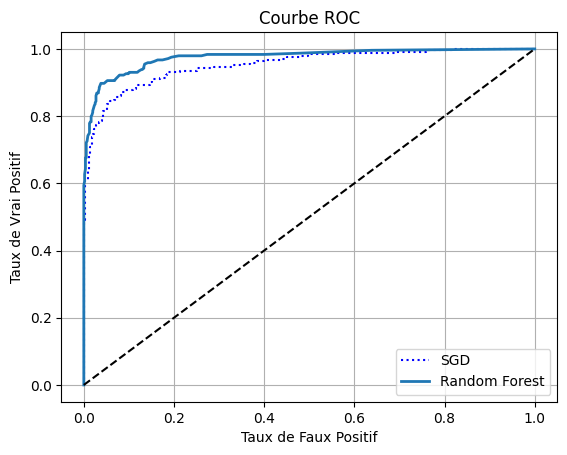

AUC modèle SGD 0.9525740063686757
AUC modèle Random Forest 0.9753398101191179


In [15]:
# On récupere les scores pour le modèle random forest
y_probas_rf = cross_val_predict(rf_clf, X_train, y_train, cv=5, method="predict_proba")
display(y_probas_rf)
y_scores_rf = y_probas_rf[:, 1]

# On calcule le TPR et FPR pour le modèle random forest
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_rf)

# On représente graphiquement les deux modèles
plt.plot(fpr_sgd, tpr_sgd, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

print("AUC modèle SGD", roc_auc_score(y_train, y_scores_sgd))
print("AUC modèle Random Forest", roc_auc_score(y_train, y_scores_rf))

On se rend compte ici que le modèle Random Forest est plus performant que le SGD.